# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maulana Andhika
- **Email:** m.andika994@gmail.com
- **ID Dicoding:** maulana_andhika

## Menentukan Pertanyaan Bisnis

- Bagaimana trend penyewaan sepeda dalam beberapa tahun terakhir?
- Pada musim apa penyewaan sepeda tertinggi?
- Pada cuaca apa penyewaan sepeda tertinggi?

## Import Semua Packages/Library yang Digunakan

In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [521]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- instant: Nomor urut baris.
- dteday: Tanggal data diambil.
- season: Musim (1: semi, 2:  panas, 3: gugur, 4: dingin).
- yr: Tahun,(0: 2011, 1:2012)
- mnth: Bulan dari 1 hingga 12.
- holiday: 1 jika hari tersebut libur, 0 jika bukan libur.
- weekday: Hari dalam minggu (0: Minggu, 1: Senin, 2: Selasa, dst).
- workingday: 1 jika hari kerja (bukan libur), 0 jika tidak.
- weathersit: Kondisi cuaca 
    + 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
    + 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
    + 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan tersebar, Hujan Ringan + Awan tersebar
    + 4: Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut
- temp: Suhu dalam celcius yang sudah dinormalisasi.
- atemp: Suhu yang dirasakan yang sudah dinormalisasi.
- hum: Kelembapan yang sudah dinormalisasi.
- windspeed: Kecepatan angin yang sudah dinormalisasi.
- casual: Jumlah pengguna casual (tanpa registrasi).
- registered: Jumlah pengguna terdaftar.
- cnt: Jumlah total penyewaan sepeda (Casual dan registered).

### Assessing Data

In [522]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Data terdiri dari 731 baris dan 16 kolom
- Dataset tidak memiliki nilai yang hilang (null) karena jumlah data non-null untuk setiap kolom sama dengan jumlah baris total.
- Ada berbagai tipe data dalam dataset:
    + Kolom int: Kolom seperti season, yr, mnth, dll.
    + Kolom float: Kolom seperti temp, atemp, hum, dan windspeed.
    + Kolom objek: Kolom dteday adalah tipe object (string). note: tipe data kemungkinan salah
- Ukuran memori yang digunakan oleh dataset adalah 91.5+ KB.

#### Cek data duplikat

In [523]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak terdapat data duplikat pada data.  
- Season: Nilai mean 2.496 menunjukkan bahwa musim kedua dan ketiga memiliki proporsi yang lebih tinggi.
- Weathersit: Mean sebesar 1.395 menunjukkan bahwa sebagian besar hari memiliki kondisi cuaca yang baik hingga sedang.
- Casual: Rata-rata jumlah pengguna kasual (non-registrasi) adalah 848 per hari, dengan maksimum 3410.
- Registered: Pengguna terdaftar jauh lebih banyak, dengan rata-rata 3656 per hari, dan maksimum mencapai 6946.
- Cnt: Rata-rata total pengguna sepeda per hari adalah 4504, dengan nilai maksimum mencapai 8714.

### Cleaning Data

#### Memperbaiki tipe data

In [524]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom dteday telah  diubah menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [525]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Mengelompokkan peminjaman sepeda berdasarkan season

In [526]:
day_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "cnt": ["max", "min", "mean", "sum"]
})

casual                           registered                            \
          max  min         mean     sum        max  min         mean     sum   
season                                                                         
1        3155    9   334.928177   60622       5315  416  2269.204420  410726   
2        3410  120  1106.097826  203522       6456  674  3886.233696  715067   
3        3160  118  1202.611702  226091       6917  889  4441.691489  835038   
4        3031    2   729.112360  129782       6946   20  3999.050562  711831   

         cnt                              
         max   min         mean      sum  
season                                    
1       7836   431  2604.132597   471348  
2       8362   795  4992.331522   918589  
3       8714  1115  5644.303191  1061129  
4       8555    22  4728.162921   841613

**Insight:**
- Peminjaman sepeda tertinggi terjadi saat season 3 (fall) dengan total peminjaman sebanyak 1061129 peminjaman 
- Peminjaman sepeda terendah terjadi saat season 1 (spring) dengan total peminjaman sebanyak 471348 peminjaman

#### Mengelompokkan peminjaman sepeda berdasarkan bulan

In [527]:
day_df.groupby(by="mnth").agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "cnt": ["max", "min", "mean", "sum"]
})

casual                          registered                             \
        max  min         mean    sum        max   min         mean     sum   
mnth                                                                         
1      1070    9   194.225806  12042       4185   416  1982.112903  122891   
2      1435   47   262.508772  14963       4546   905  2392.789474  136389   
3      3155   46   716.838710  44444       5893   491  2975.419355  184476   
4      3252  120  1013.366667  60802       5950   674  3471.533333  208292   
5      3410  255  1214.274194  75285       6433  2213  4135.500000  256401   
6      2963  477  1231.766667  73906       6456  2993  4540.600000  272436   
7      3065  562  1260.596774  78157       6790  2298  4303.080645  266791   
8      2827  226  1161.919355  72039       6541   889  4502.500000  279155   
9      3160  118  1172.050000  70323       6946  1689  4594.466667  275668   
10     3031    2   963.870968  59760       6911    20  4235.354839  262592   
11     2290   69   610.050000  36603       5520   935  3637.133333  218228   
12     1153    9   349.887097  21693       6055   432  3053.919355  189343   

       cnt                             
       max   min         mean     sum  
mnth                                   
1     4521   431  2176.338710  134933  
2     5062  1005  2655.298246  151352  
3     8362   605  3692.258065  228920  
4     7460   795  4484.900000  269094  
5     8294  2633  5349.774194  331686  
6     8120  3767  5772.366667  346342  
7     8173  3285  5563.677419  344948  
8     7865  1115  5664.419355  351194  
9     8714  1842  5766.516667  345991  
10    8156    22  5199.225806  322352  
11    6852  1495  4247.183333  254831  
12    6606   441  3403.806452  211036

**Insight:**
- Peminjaman sepeda cenderung mengalami peningkatan dari bulan januari hingga september
- Peminjaman sepeda cenderung mengalami penurunan dari bulan oktober hingga januari

#### Mengelompokkan peminjaman sepeda berdasarkan kondisi cuaca

In [528]:
day_df.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "cnt": ["max", "min", "mean", "sum"]
})

casual                         registered                    \
              max min        mean     sum        max  min         mean   
weathersit                                                               
1            3410  15  964.030238  446346       6946  416  3912.755940   
2            3155   9  687.352227  169776       6844  491  3348.510121   
3            1264   2  185.476190    3895       4324   20  1617.809524   

                      cnt                             
                sum   max  min         mean      sum  
weathersit                                            
1           1811606  8714  431  4876.786177  2257952  
2            827082  8362  605  4035.862348   996858  
3             33974  4639   22  1803.285714    37869

**Insight:**
- Peminjaman sepeda tertinggi terjadi saat kondisi cuaca 1 (cerah) dengan total peminjaman 2257952 peminjaman 
- Peminjaman sepeda terendah terjadi saat kondisi cuaca 3 (badai) dengan total peminjaman 37869 peminjaman 

#### Mengelompokkan peminjaman berdasarkah hari

In [529]:
day_df.groupby(by='weekday').agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                           
          max   min         mean     sum
weekday                                 
0        8227   605  4228.828571  444027
1        7525    22  4338.123810  455503
2        7767   683  4510.663462  469109
3        8173   441  4548.538462  473048
4        7804   431  4667.259615  485395
5        8362  1167  4690.288462  487790
6        8714   627  4550.542857  477807

**Insight:**
- Peminjaman sepeda cenderung merata setiap harinya berkisar 44000 - 48000, dengan peminjaman tertinggi terjadi pada hari Jumat

#### Mengelompokkan peminjaman berdasarkan hari kerja

In [530]:
day_df.groupby(by='workingday').agg({
    "cnt": ["max", "min", "mean"]
})

cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

**Insight:**
- Peminjaman sepeda pada hari kerja lebih banyak dibandingkan dengan hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend penyewaan sepeda dalam beberapa tahun terakhir?


C:\Users\Maulana Andhika\AppData\Local\Temp\ipykernel_16756\1896907931.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({


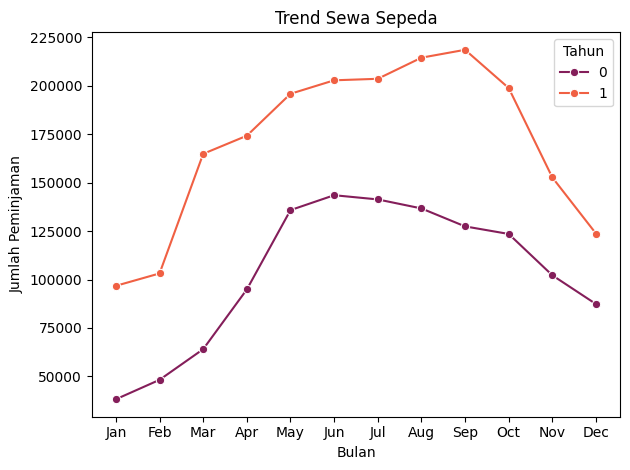

In [531]:
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec',
})

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=month_order, ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o")

plt.title("Trend Sewa Sepeda")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pada musim apa penyewaan sepeda tertinggi?


C:\Users\Maulana Andhika\AppData\Local\Temp\ipykernel_16756\2817886779.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_data = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


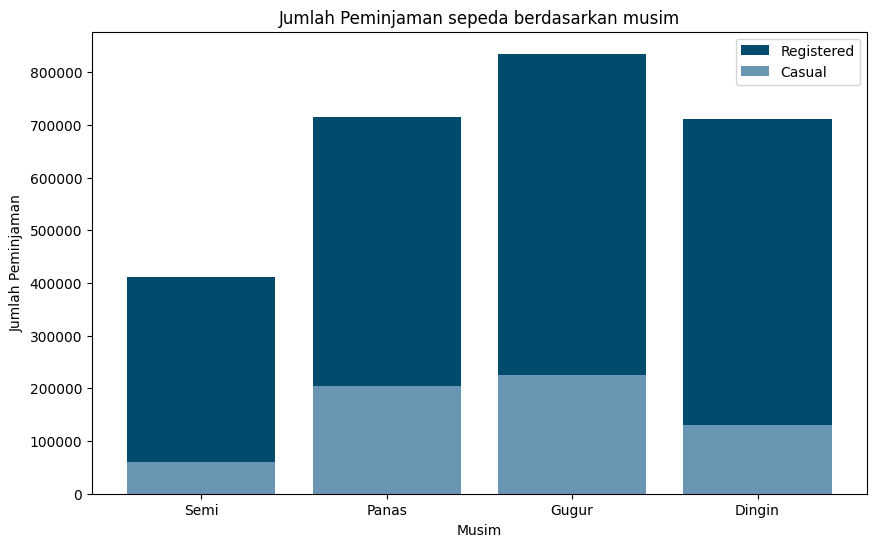

In [532]:
day_df['season'] = day_df['season'].map({
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
})

season_order = ['Semi', 'Panas', 'Gugur', 'Dingin']
day_df['season'] = pd.Categorical(day_df['season'], categories=season_order, ordered=True)

season_data = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(
    season_data['season'],
    season_data['registered'],
    label='Registered',
    color='#004c6d'
)

plt.bar(
    season_data['season'],
    season_data['casual'],
    label='Casual',
    color='#6996b3'
)

plt.title('Jumlah Peminjaman sepeda berdasarkan musim')
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.legend()
plt.show()

### Pertanyaan 3: Pada cuaca apa penyewaan sepeda tertinggi?

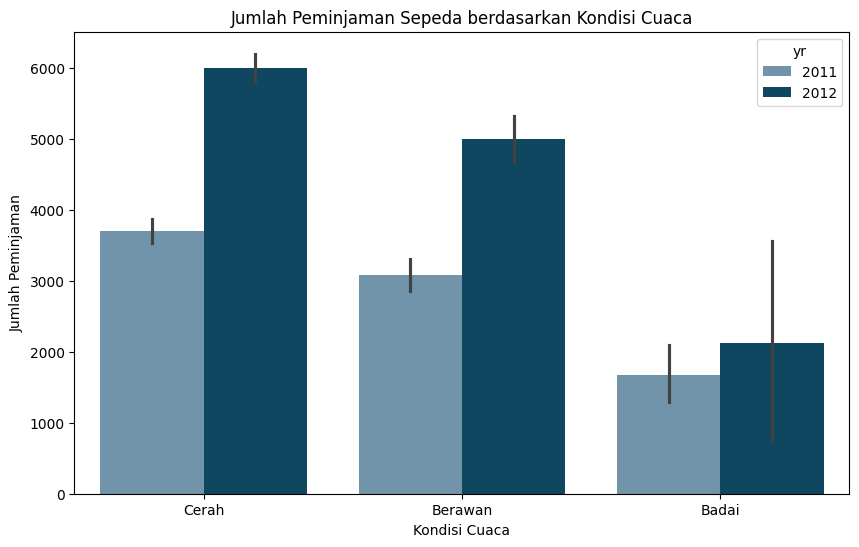

In [533]:
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Cerah', 2: 'Berawan', 3: 'Badai'
})

weahersit_orders = ['Cerah', 'Berawan', 'Badai']
day_df['weathersit'] = pd.Categorical(day_df['weathersit'], categories=weahersit_orders, ordered=True)

day_df['yr'] = day_df['yr'].map({
    0: 2011, 1: 2012
})

plt.figure(figsize=(10,6))

sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    hue='yr',
    palette=['#6996b3', '#004c6d'])

plt.title('Jumlah Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.show()

## Analisis Lanjutan (Opsional)

#### Menentukan kapan saat terbaik untuk meminjam sepeda

In [534]:
day_df["temp_bin"] = pd.cut(
    day_df["temp"], 
    bins=[0, 0.2, 0.7, 1],
    labels=["low", "medium", "high"]
)

day_df["windspeed_bin"] = pd.cut(
    day_df["windspeed"], 
    bins=[0, 0.4, 1], 
    labels=["low", "high"]
)

day_df["hum_bin"] = pd.cut(
    day_df["hum"], 
    bins=[0, 0.8, 1], 
    labels=["low", "high"]
)

def rekomendasi_binning(row):
    if (
        row["weathersit"] == "Cerah" or "Berawan" and
        row["temp_bin"] == "medium" and
        row["windspeed_bin"] == "low" and
        row["hum_bin"] == "low"
    ):
        return "iya"
    else:
        return "tidak"

day_df["rekomendasi"] = day_df.apply(rekomendasi_binning, axis=1)

day_df



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_bin,windspeed_bin,hum_bin,rekomendasi
0,1,2011-01-01,Semi,2011,Jan,0,6,0,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985,medium,low,high,tidak
1,2,2011-01-02,Semi,2011,Jan,0,0,0,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801,medium,low,low,iya
2,3,2011-01-03,Semi,2011,Jan,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349,low,low,low,iya
3,4,2011-01-04,Semi,2011,Jan,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562,low,low,low,iya
4,5,2011-01-05,Semi,2011,Jan,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600,medium,low,low,iya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Semi,2012,Dec,0,4,1,Berawan,0.254167,0.226642,0.652917,0.350133,247,1867,2114,medium,low,low,iya
727,728,2012-12-28,Semi,2012,Dec,0,5,1,Berawan,0.253333,0.255046,0.590000,0.155471,644,2451,3095,medium,low,low,iya
728,729,2012-12-29,Semi,2012,Dec,0,6,0,Berawan,0.253333,0.242400,0.752917,0.124383,159,1182,1341,medium,low,low,iya
729,730,2012-12-30,Semi,2012,Dec,0,0,0,Cerah,0.255833,0.231700,0.483333,0.350754,364,1432,1796,medium,low,low,iya


## Visualisasi Rekomendasi

rekomendasi
iya      611
tidak    120
Name: count, dtype: int64


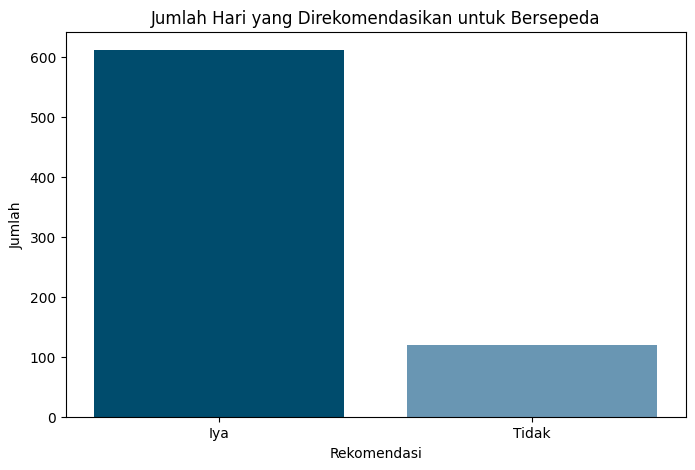

In [535]:
rekomendasi_counts = day_df["rekomendasi"].value_counts()

print(rekomendasi_counts)

plt.figure(figsize=(8, 5))
plt.bar(rekomendasi_counts.index, rekomendasi_counts.values, color=["#004c6d", "#6996b3"])
plt.title("Jumlah Hari yang Direkomendasikan untuk Bersepeda")
plt.xlabel("Rekomendasi")
plt.ylabel("Jumlah")
plt.xticks(ticks=[0, 1], labels=["Iya", "Tidak"])
plt.show()

**Insight:**
- Rekomendasi hari untuk bersepeda di atas didasarkan pada kondisi cuaca, kecepatan angin, suhu, dan kelembaban. Jika kondisi cuaca cerah atau berawan dan suhu yang medium, keceptan angin yang rendah, kelembaban yang rendah akan menghasilkan rekomendasi "Iya" untuk bersepeda.
- Hasil rekomendasi dari aturan yang sudah ditetepkan di atas menunjukkan lebih banyak hari yang direkomendasikan untuk bersepeda sebanyak 611 hari dibandingkan hari yang tidak direkomendasikan sebanyak 120 hari.

## Conclusion

- Tren penyewaan sepeda meningkat pada tahun 2012 dibandingkan tahun 2011. Penyewaan sepeda meningkat pada awal  hingga pertengahan tahun, mulai dari bulan januari hingga September, dan menurun pada akhir hingga awal tahun tahun.
- Berdasarkan musim peminjaman sepeda terus mengalami peningkatan mulai dari musim semi hingga musim gugu dan sedikit mengalami penurunan pada musim dingin. Peminjaman sepeda tertinggi terjadi pada musim gugur
- Berdasarkan cuaca peminjaman sepeda paling tinggi terjadi saat cuaca cerah, sedangkan peminjaman sepeda paling sedikit saat cuaca sedang hujan/buruk